**Context**

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers.

In [244]:
# Standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## **1. Get the data ready**

In [245]:
#read file
df = pd.read_csv("sample_data/Loan_Data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [246]:
df.shape

(614, 13)

In [247]:
#check null values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [248]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [250]:
#replace Y/N value of Loan_Status to 1/0
mapping = {'Y': 1, 'N': 0}
df["Loan_Status"] = df["Loan_Status"].replace(mapping)


In [251]:
df["Loan_Status"].unique()

array([1, 0])

In [252]:
# Create X (all the feature columns)
X = df.drop(["Loan_ID","Loan_Status"], axis=1)

# Create y (the target column)
y = df["Loan_Status"]

In [253]:
X = X.interpolate()
X.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            1
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [254]:
#handle missing values
X["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [255]:
X.Gender = X["Gender"].fillna("Male")

In [256]:
X["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [257]:
X.Married = X["Married"].fillna("Yes")

In [258]:
X["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [259]:
X.Dependents = X["Dependents"].fillna("0")

In [260]:
X["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [261]:
X.Self_Employed = X["Self_Employed"].fillna("No")

In [262]:
X["LoanAmount"].value_counts()

120.0    21
110.0    17
100.0    15
128.0    12
187.0    12
         ..
47.0      1
42.0      1
72.0      1
240.0     1
253.0     1
Name: LoanAmount, Length: 211, dtype: int64

In [263]:
X.LoanAmount = X["LoanAmount"].fillna(120)

In [264]:
X.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [265]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [266]:
#turn categories into numbers
# Initialize LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

categorical_features = ["Gender","Married","Dependents","Education","Self_Employed","Loan_Amount_Term","Property_Area"]
for column in categorical_features:
    X[column] = label_encoder.fit_transform(X[column])


In [267]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,120.0,10,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,10,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,10,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,10,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,10,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,10,1.0,0
610,1,1,3,0,0,4106,0.0,40.0,5,1.0,0
611,1,1,1,0,0,8072,240.0,253.0,10,1.0,2
612,1,1,2,0,0,7583,0.0,187.0,10,1.0,2


In [268]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
np.random.seed(12)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

## **2. Choose the model/estimator**

In [269]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators= 10)

## **3. Fit the model to the data and use it to make a prediction**

In [270]:
#scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [271]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [272]:
# Make predictions
y_preds = model.predict(X_test)
y_preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0])

## **4. Evaluate the model**

In [273]:
# On the training set
model.score(X_train, y_train)

0.9938900203665988

In [274]:
# On the test set (unseen)
model.score(X_test, y_test)

0.8373983739837398

In [275]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_preds)
acs = accuracy_score(y_test, y_preds)
cm, acs

(array([[24, 14],
        [ 6, 79]]),
 0.8373983739837398)

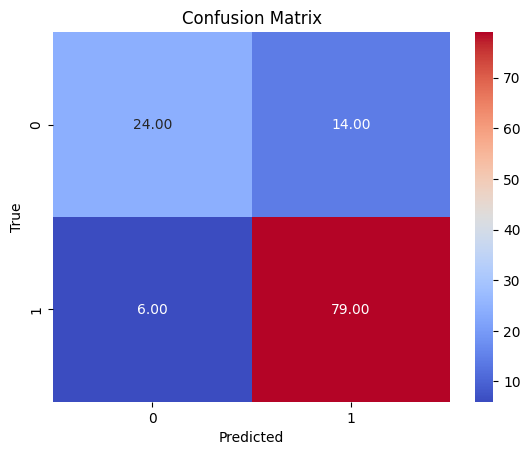

In [276]:
# Confusion matrix graph using seaborn
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='.2f', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()